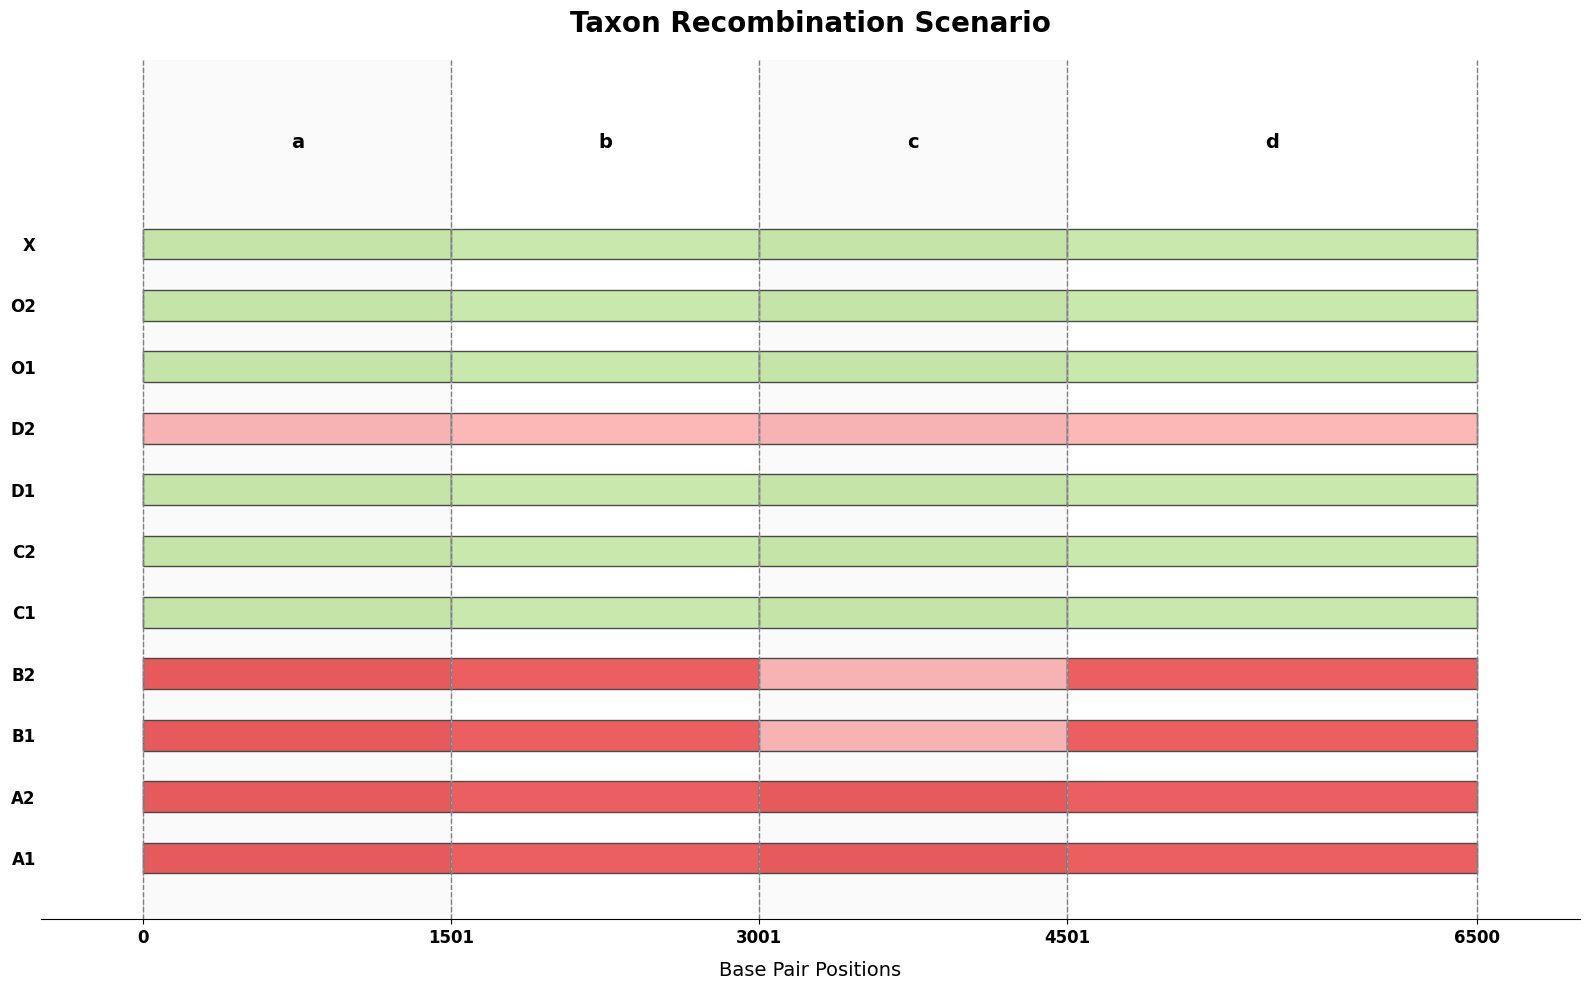

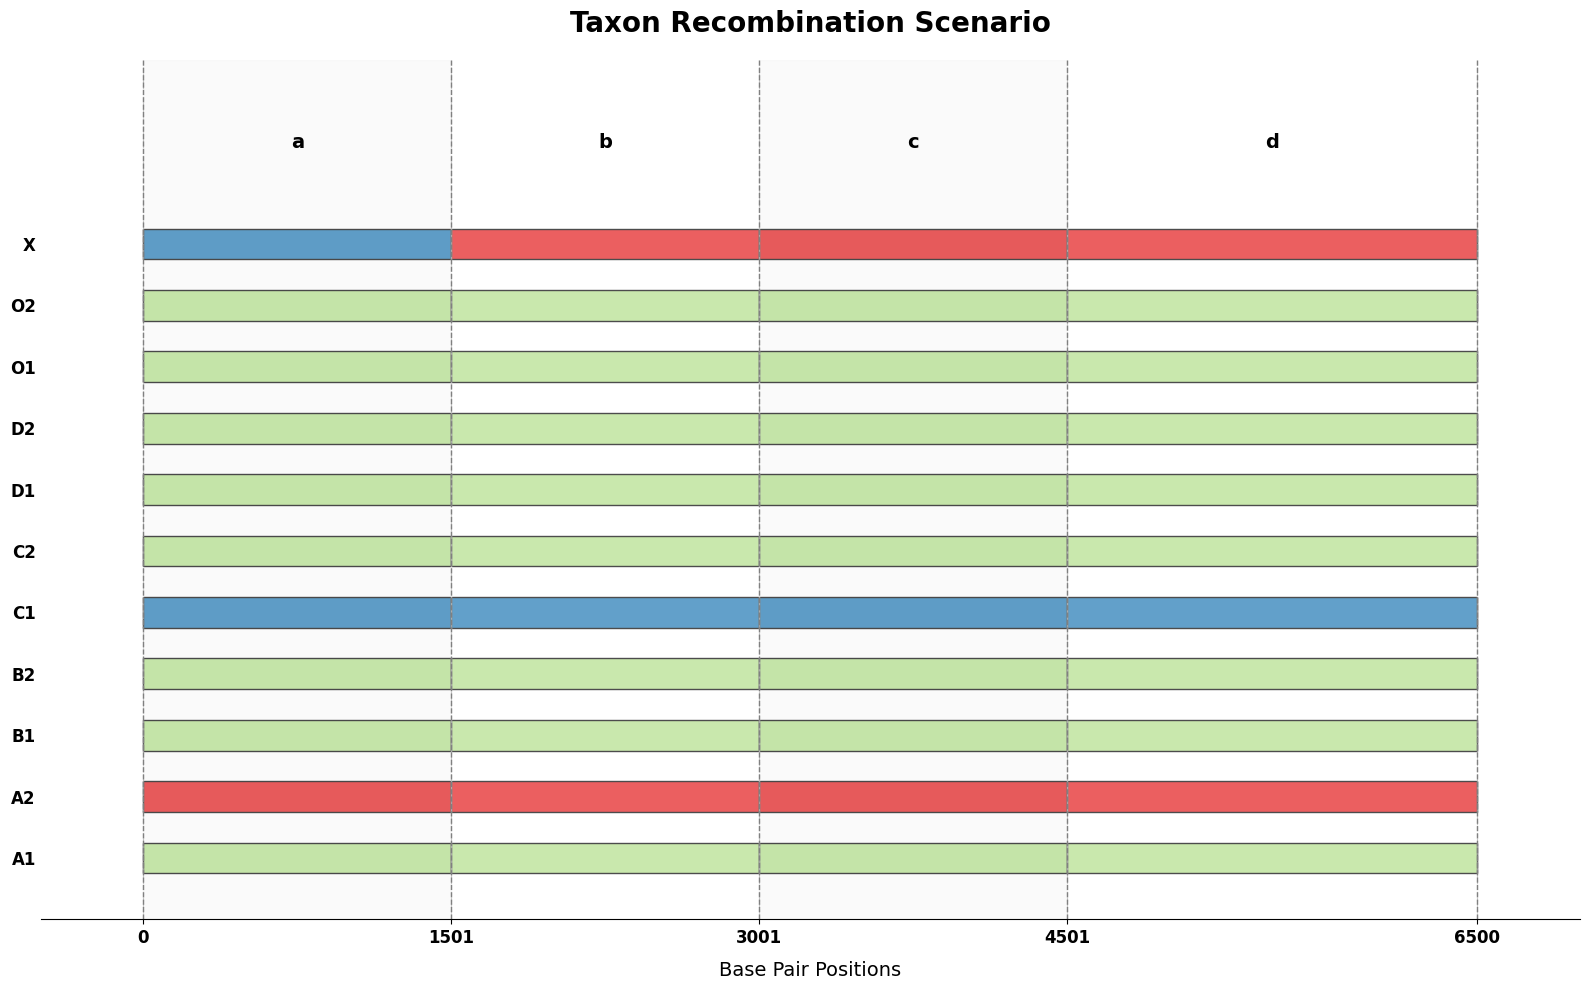

In [30]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


def draw_taxon_recombination(
    ax,
    taxon_positions,
    taxon_labels,
    boundaries,
    region_labels,
    colors,
    recombination_switches,
):
    """
    Draws a recombination scenario with separate rectangles for each taxon, showing recombination by color switch,
    categorizes regions with labels a, b, c, d, and adds x-axis labels at boundary breakpoints.

    Parameters:
    - ax: Matplotlib axis object to plot on.
    - taxon_positions: Y-axis positions for each taxon.
    - taxon_labels: List of taxon names to display.
    - boundaries: List of tuples representing boundaries of different regions (start, end).
    - region_labels: List of labels for each region (e.g., ['a', 'b', 'c', 'd']).
    - colors: List of base colors for each taxon.
    - recombination_switches: Dictionary where keys are the taxon indices that switch color,
                               and values are dictionaries mapping boundary indices to new colors.
    """
    # Draw rectangles for each taxon
    for i, y_pos in enumerate(taxon_positions):
        for j, (start, end) in enumerate(boundaries):
            # Determine the color: check if there's a recombination switch
            color = recombination_switches.get(i, {}).get(j, colors[i])
            rect = Rectangle(
                (start, y_pos - 0.25),
                end - start,
                0.5,
                edgecolor="black",
                facecolor=color,
                linewidth=1,
            )
            ax.add_patch(rect)

    # Draw vertical lines to indicate boundaries
    for j, (start, _) in enumerate(boundaries):
        ax.axvline(x=start, color="grey", linestyle="--", linewidth=1)
    ax.axvline(
        x=boundaries[-1][1], color="grey", linestyle="--", linewidth=1
    )  # Last boundary end

    # Categorize and label regions
    for j, (start, end) in enumerate(boundaries):
        region_label = region_labels[j]
        # Calculate the midpoint of the region for label placement
        midpoint = start + (end - start) / 2
        # Position the label above the plot
        ax.text(
            midpoint,
            len(taxon_positions) + 0.5,
            f"{region_label}",
            ha="center",
            va="bottom",
            fontsize=14,
            fontweight="bold",
            color="black",
        )
        # Add a subtle background shade for each region
        shade_color = "#f0f0f0" if j % 2 == 0 else "#ffffff"
        ax.axvspan(start, end, color=shade_color, alpha=0.3)

    # Customize plot appearance
    ax.set_xlim(-500, max([end for _, end in boundaries]) + 500)
    ax.set_ylim(
        -1, len(taxon_positions) + 2
    )  # Increased ylim to accommodate region labels
    ax.set_xlabel("Base Pair Positions", fontsize=14, labelpad=10)
    ax.set_title("Taxon Recombination Scenario", fontsize=20, fontweight="bold", pad=20)

    # Set y-ticks and labels only once
    ax.set_yticks(taxon_positions)
    ax.set_yticklabels(taxon_labels, fontsize=12, fontweight="bold")

    # Set x-ticks at boundary breakpoints
    breakpoints = [start for (start, _) in boundaries] + [boundaries[-1][1]]
    ax.set_xticks(breakpoints)
    ax.set_xticklabels([str(bp) for bp in breakpoints], fontsize=12, fontweight="bold")

    # Improve aesthetics
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.tick_params(axis="y", which="both", length=0)  # Remove y-axis tick marks

    # Add grid for better readability
    ax.grid(axis="x", linestyle="--", alpha=0.7)

    # Adjust layout for better spacing
    plt.tight_layout()


def plot_recombination_scenario_b1_b2_d2():
    # Define parameters
    taxon_labels = ["A1", "A2", "B1", "B2", "C1", "C2", "D1", "D2", "O1", "O2", "X"]
    taxon_positions = list(
        range(len(taxon_labels))
    )  # Position each taxon along the y-axis
    boundaries = [
        (0, 1500),
        (1501, 3000),
        (3001, 4500),
        (4501, 6500),
    ]  # Base pair positions
    region_labels = ["a", "b", "c", "d"]  # Labels for each region

    # Define a color-blind friendly palette
    colors = [
        "#1f78b4",  # A1 - Group A (Blue)
        "#1f78b4",  # A2 - Group A (Blue)
        "#ff7f00",  # B1 - Group B (Orange)
        "#ff7f00",  # B2 - Group B (Orange)
        "#b2df8a",  # C1 - Outgroup (Light Green)
        "#b2df8a",  # C2 - Outgroup (Light Green)
        "#b2df8a",  # D1 - Outgroup (Light Green)
        "#6a3d9a",  # D2 - Group D (Purple)
        "#b2df8a",  # O1 - Outgroup (Light Green)
        "#b2df8a",  # O2 - Outgroup (Light Green)
        "#b2df8a",  # X - Outgroup (Light Green)
    ]

    # Define recombination switches where taxon_index: {boundary_index: new_color}
    recombination_switches = {
        0: {
            0: "#e31a1c",
            1: "#e31a1c",
            2: "#e31a1c",
            3: "#e31a1c",
        },  # A1 recombines to Group A (Red)
        1: {
            0: "#e31a1c",
            1: "#e31a1c",
            2: "#e31a1c",
            3: "#e31a1c",
        },  # A2 recombines to Group A (Red)
        2: {
            0: "#e31a1c",
            1: "#e31a1c",
            2: "#fb9a99",
            3: "#e31a1c",
        },  # B1 recombines to Group D (Light Red)
        3: {
            0: "#e31a1c",
            1: "#e31a1c",
            2: "#fb9a99",
            3: "#e31a1c",
        },  # B2 recombines to Group D (Light Red)
        7: {
            0: "#fb9a99",
            1: "#fb9a99",
            2: "#fb9a99",
            3: "#fb9a99",
        },  # D2 recombines to Group D (Light Red)
    }

    # Create plot
    fig, ax = plt.subplots(figsize=(16, 10))
    draw_taxon_recombination(
        ax,
        taxon_positions,
        taxon_labels,
        boundaries,
        region_labels,
        colors,
        recombination_switches,
    )

    # Save the plot as a high-resolution image suitable for publication
    plt.savefig(
        "taxon_recombination_scenario_b1_b2_d2.png", dpi=300, bbox_inches="tight"
    )

    # Display the plot
    plt.show()


def plot_recombination_scenario_x_c1_a2():
    # Define parameters
    taxon_labels = ["A1", "A2", "B1", "B2", "C1", "C2", "D1", "D2", "O1", "O2", "X"]
    taxon_positions = list(
        range(len(taxon_labels))
    )  # Position each taxon along the y-axis
    boundaries = [
        (0, 1500),
        (1501, 3000),
        (3001, 4500),
        (4501, 6500),
    ]  # Base pair positions
    region_labels = ["a", "b", "c", "d"]  # Labels for each region

    # Define a color-blind friendly palette
    colors = [
        "#b2df8a",  # A1 - Outgroup (Light Green)
        "#e31a1c",  # A2 - Recombined to Group A (Red)
        "#b2df8a",  # B1 - Outgroup (Light Green)
        "#b2df8a",  # B2 - Outgroup (Light Green)
        "#1f78b4",  # C1 - Group A (Blue)
        "#b2df8a",  # C2 - Outgroup (Light Green)
        "#b2df8a",  # D1 - Outgroup (Light Green)
        "#b2df8a",  # D2 - Outgroup (Light Green)
        "#b2df8a",  # O1 - Outgroup (Light Green)
        "#b2df8a",  # O2 - Outgroup (Light Green)
        "#fb9a99",  # X - Recombined to Group A (Light Red)
    ]

    # Define recombination switches where taxon_index: {boundary_index: new_color}
    recombination_switches = {
        1: {
            0: "#e31a1c",
            1: "#e31a1c",
            2: "#e31a1c",
            3: "#e31a1c",
        },  # A2 recombines to Group A (Red)
        4: {
            0: "#1f78b4",
            1: "#1f78b4",
            2: "#1f78b4",
            3: "#1f78b4",
        },  # C1 recombines to Group A (Blue)
        10: {
            0: "#1f78b4",
            1: "#e31a1c",
            2: "#e31a1c",
            3: "#e31a1c",
        },  # X recombines to Group A (Blue then Red)
    }

    # Create plot
    fig, ax = plt.subplots(figsize=(16, 10))
    draw_taxon_recombination(
        ax,
        taxon_positions,
        taxon_labels,
        boundaries,
        region_labels,
        colors,
        recombination_switches,
    )

    # Save the plot as a high-resolution image suitable for publication
    plt.savefig(
        "taxon_recombination_scenario_x_c1_a2.png", dpi=300, bbox_inches="tight"
    )

    # Display the plot
    plt.show()


# Plot the first recombination scenario
plot_recombination_scenario_b1_b2_d2()

# Plot the second recombination scenario
plot_recombination_scenario_x_c1_a2()